# Featurization, Model Selection & Tuning

## Problem Statement

Customers' leaving credit card services would lead the bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and the reason for same - so that the bank could improve upon those areas.
You as a Data Scientist at Thera Bank need to explore the data provided, identify patterns, and come up with a classification model to identify customers likely to churn, and provide actionable insights and recommendations that will help the bank improve its services so that customers do not renounce their credit cards.

## Data Dictionary

- CLIENTNUM: Client number. Unique identifier for the customer holding the account
- Attrition Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
- Customer_Age: Age in Years
- Gender: The gender of the account holder
- Dependent_count: Number of dependents
- Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
- Marital Status: Marital Status of the account holder
- Income Category: Annual Income Category of the account holder
- Card_Category: Type of Card
- Months_on_book: Period of relationship with the bank
- Total Relationship_Count: Total no. of products held by the customer
- Months_Inactive_12_mon: No. of months inactive in the last 12 months
- Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
- Credit_Limit: Credit Limit on the Credit Card
- Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
- Avg_Open To Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
- Total_Trans_Amt: Total Transaction Amount (Last 12 months)
- Total_Trans_Ct: Total Transaction Count (Last 12 months)
- Total Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in the 1st quarter
- Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in the 1st quarter
- Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

In [1]:
#importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv("datasets/BankChurners.csv")

In [3]:
#colummn names of the data
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [4]:
#shape of the data
data.shape

(10127, 21)

### Observations

There are 10127 rows and 21 features

In [5]:
#information about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

### Observations

- 'CLIENTNUM','Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Revolving_Bal','Total_Trans_Amt','Total_Trans_Ct', are of type int64
- 'Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category' are of type object
- 'Credit_Limit','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio' are of type float64

In [6]:
#feature-wise description of the data 
data.describe(include='all')

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
count   1.012700e+04              10127  10127.000000  10127     10127.000000   
unique           NaN                  2           NaN      2              NaN   
top              NaN  Existing Customer           NaN      F              NaN   
freq             NaN               8500           NaN   5358              NaN   
mean    7.391776e+08                NaN     46.325960    NaN         2.346203   
std     3.690378e+07                NaN      8.016814    NaN         1.298908   
min     7.080821e+08                NaN     26.000000    NaN         0.000000   
25%     7.130368e+08                NaN     41.000000    NaN         1.000000   
50%     7.179264e+08                NaN     46.000000    NaN         2.000000   
75%     7.731435e+08                NaN     52.000000    NaN         3.000000   
max     8.283431e+08                NaN     73.000000    NaN         5.000000   

       Education_Level Marital_Status Income_Category Card_Category  \
count             8608           9378           10127         10127   
unique               6              3               6             4   
top           Graduate        Married  Less than $40K          Blue   
freq              3128           4687            3561          9436   
mean               NaN            NaN             NaN           NaN   
std                NaN            NaN             NaN           NaN   
min                NaN            NaN             NaN           NaN   
25%                NaN            NaN             NaN           NaN   
50%                NaN            NaN             NaN           NaN   
75%                NaN            NaN             NaN           NaN   
max                NaN            NaN             NaN           NaN   

        Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
count     10127.000000  ...            10127.000000           10127.000000   
unique             NaN  ...                     NaN                    NaN   
top                NaN  ...                     NaN                    NaN   
freq               NaN  ...                     NaN                    NaN   
mean         35.928409  ...                2.341167               2.455317   
std           7.986416  ...                1.010622               1.106225   
min          13.000000  ...                0.000000               0.000000   
25%          31.000000  ...                2.000000               2.000000   
50%          36.000000  ...                2.000000               2.000000   
75%          40.000000  ...                3.000000               3.000000   
max          56.000000  ...                6.000000               6.000000   

        Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
count   10127.000000         10127.000000     10127.000000   
unique           NaN                  NaN              NaN   
top              NaN                  NaN              NaN   
freq             NaN                  NaN              NaN   
mean     8631.953698          1162.814061      7469.139637   
std      9088.776650           814.987335      9090.685324   
min      1438.300000             0.000000         3.000000   
25%      2555.000000           359.000000      1324.500000   
50%      4549.000000          1276.000000      3474.000000   
75%     11067.500000          1784.000000      9859.000000   
max     34516.000000          2517.000000     34516.000000   

        Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count           10127.000000     10127.000000    10127.000000   
unique                   NaN              NaN             NaN   
top                      NaN              NaN             NaN   
freq                     NaN              NaN             NaN   
mean                0.759941      4404.086304       64.858695   
std                 0.219207      3397.129254       23.472570   
min                 0.000000       510.000000   

### Observations

- 'Attrition_Flag' attribute has two unique values and most of which are Existing Customer
- 'Customer_Age' has mean value of 46.32 and median of 46 indicating very less or no outliers
- 'Gender' has 2 unique values M and F which more of Females
- 'Dependent_Count' has mean of 2.34 and median of 2 indicating very less outliers
- 'Education_Level' has 6 unique values with null values 
- 'Marital_Status' has 3 unique values with some null values as well
- 'Income_Category' has 6 unique values with most people in the 'Less than $40K' 
- 'Card Category' has 4 unique value with Blue being most prominent
- 'Months_on_book' has mean of 35.92 and median of 36 indicating very less or no outliers
- 'Total_Relationship' has smean of 3.8 and median of 4 indicting few outliers
- 'Months_Inactive_12_mon' has mean 2.3 and median 2 which has less outliers
- 'Contacts_Count_12_mon' has mean 2.45 and median 2 which shows that it has less outliers
- 'Credit_Limit' has mean of 8631.95 and median 4549 which shows that it has siginificant number of outliers
- 'Total_Revolving_Bal' has mean of 1162.81 and median 1276 showing some outliers presence
- 'Avg_Open_To_Buy' has mean of 7469.13 and median of 3474 showing outlier presence
- 'Total_Amt_Chng_Q4_Q1' has mean of 0.75 and median 0.73 showing little or no outliers present
- 'Total_Trans_Amt' has mean of 4404.08 and median 3899 showing some outliers to be present
- 'Total_Trans_Ct' has mean of 64.85 and median 67 showing some small outliers to be present
- 'Total_Ct_Chng_Q4_Q1' has mean of 0.71 and median of 0.7 showing not much outliers
- 'Avg_Utilization_Ratio' has mean of 0.27 and median of 0.17 showing existence of outliers

## EDA Univariate Analysis

- CLIENTNUM is a unique identifier therefore plotting for analysis would not make sense

<Axes: xlabel='Attrition_Flag', ylabel='count'>

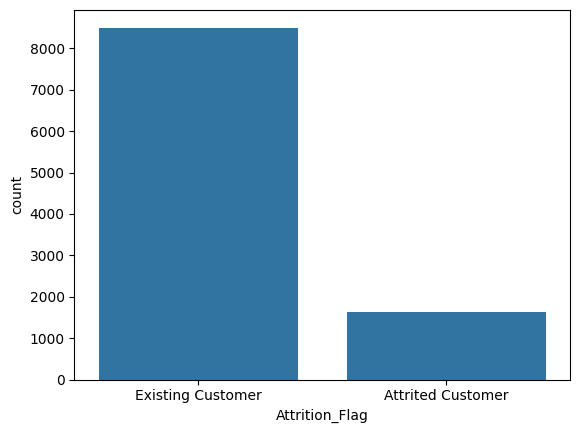

In [7]:
#plotting countplot for Attrition_Flag
sns.countplot(data,x='Attrition_Flag')

### Observations

- Existing Customer has a count of more than 8000
- Attrited Customer has a count of nearly 2000 

This is pretty imbalanced and would require some balancing

<Axes: xlabel='Customer_Age'>

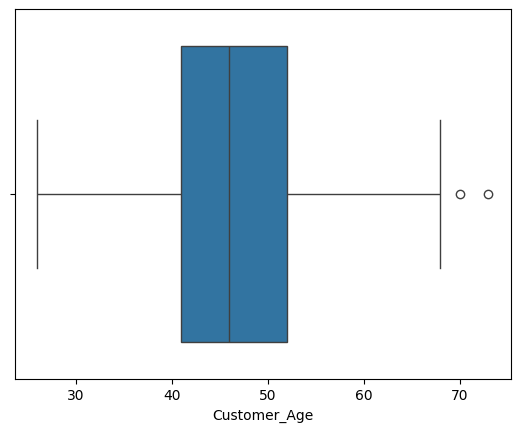

In [8]:
#plotting boxplot for Customer_Age
sns.boxplot(data,x='Customer_Age')

### Observations

- The median is close to 45 
- The data does not look skewed but has few outliers
- These outliers are justified since customers  can be of varied age waiting for a credit card

<Axes: xlabel='Gender', ylabel='count'>

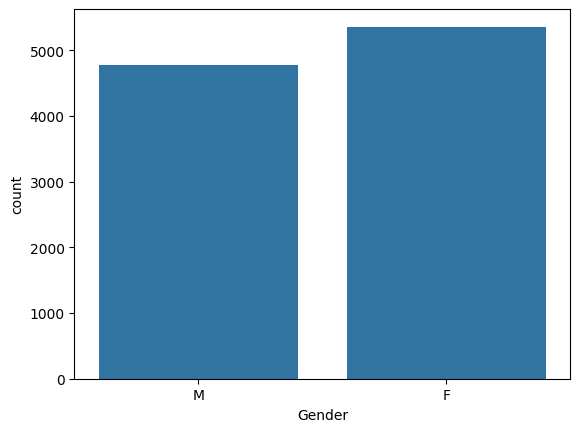

In [9]:
#ploting a countplot for gender
sns.countplot(data,x='Gender')

### Observations 

- The Male gender has a count of nearly 4600
- The Female gender has a count of more than 5000
- The data is balanced wrt Gender

<Axes: xlabel='Dependent_count'>

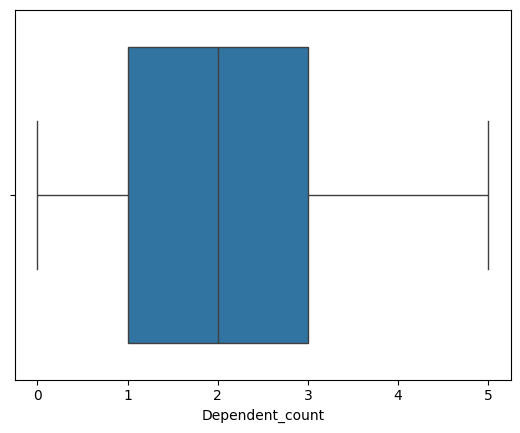

In [10]:
#plotting a boxplot for dependent_count
sns.boxplot(data,x='Dependent_count')

### Observations

- The median is at 2
- The data seems right skewed but has no outliers

<Axes: xlabel='Education_Level', ylabel='count'>

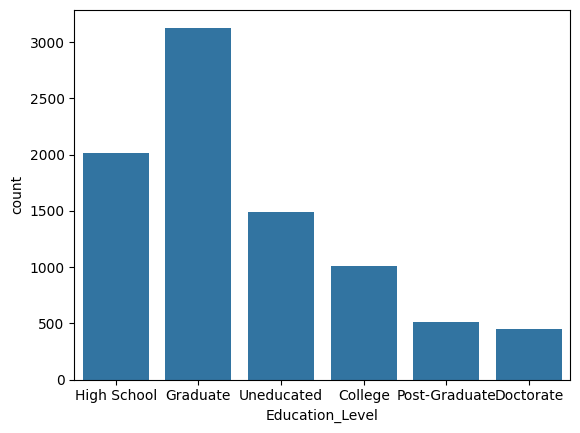

In [11]:
#plotting countplot for education
sns.countplot(data,x='Education_Level')

### Observations 

- Most of the applications come from people who are Graduates
- Least number of applications from people who are Doctorate
- High School applications also are of good number

<Axes: xlabel='Marital_Status', ylabel='count'>

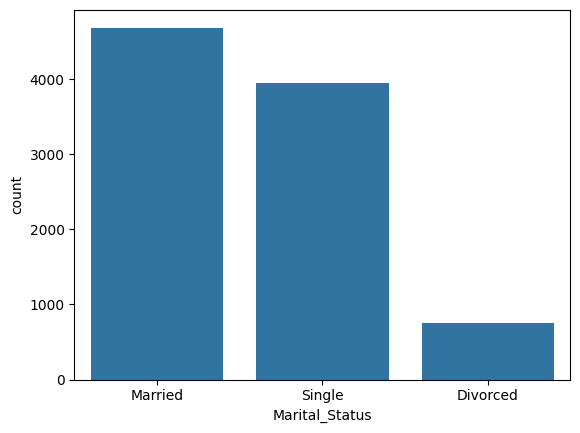

In [12]:
#plotting counplot for Martial_Status

sns.countplot(data,x='Marital_Status') 

### Observations

- Most applications are of Married Status
- Least applications are of Divorced Status

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '$60K - $80K'),
  Text(1, 0, 'Less than $40K'),
  Text(2, 0, '$80K - $120K'),
  Text(3, 0, '$40K - $60K'),
  Text(4, 0, '$120K +'),
  Text(5, 0, 'abc')])

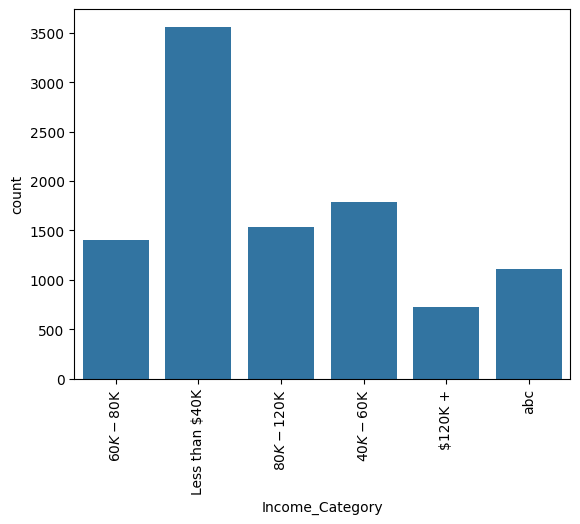

In [13]:
#plotting countplot for Income_Category
sns.countplot(data,x='Income_Category')
plt.xticks(rotation = 90)

### Observations 

- Most applications have income category of 'Less than $40K' 
- Least application have income category more than $120K
- There are applications under the category of 'abc' which are people who might not be comfortable in revealing their income and needs variable redefinition

<Axes: xlabel='Card_Category', ylabel='count'>

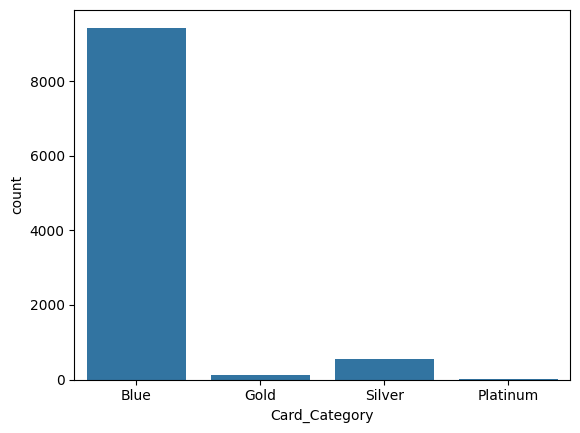

In [14]:
#plotting countplot of Card Category
sns.countplot(data,x='Card_Category')

### Observations

- Most applications have type of card as Blue 
- Least applicaations have type of card of Platnium

<Axes: xlabel='Months_on_book'>

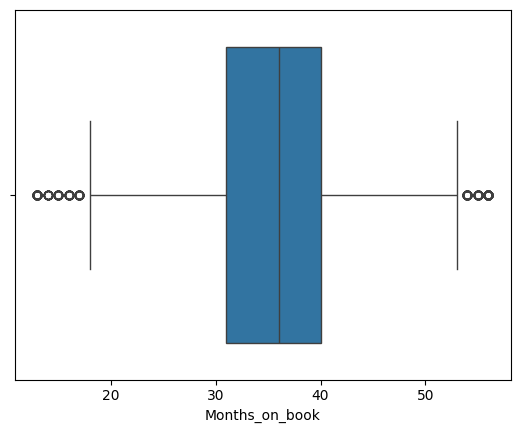

In [15]:
#pplotting boxplot for Months_on_book
sns.boxplot(data,x='Months_on_book')

### Observations

- The median is nearly 35 
- The column seems left skewed wit hfew outliers on each end
- The extreme values which are outliers are justifies since some customers can have new as well as old relationship with bank

<Axes: xlabel='Total_Relationship_Count'>

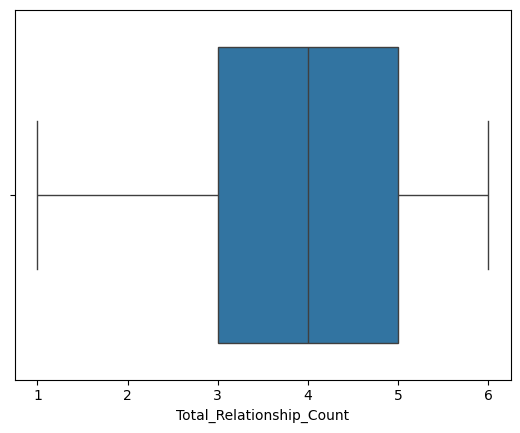

In [16]:
#plotting boxplot with total_relationship_count
sns.boxplot (data,x='Total_Relationship_Count')

### Observations

- The median is close to 4
- The feature seems left skewed but has no  outliers
- 75% of applictions have more than 3 products 

<Axes: xlabel='Months_Inactive_12_mon'>

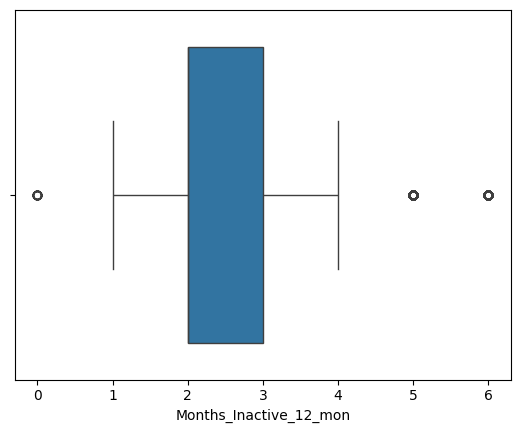

In [17]:
#plotting boxplot for Months Inactive 12 mon
sns.boxplot(data,x='Months_Inactive_12_mon')

### Observations 

- The median is somewhere in between 2 and 3
- There are some outliers but cannot be treated since the customers can stay active based on their choices

<Axes: xlabel='Contacts_Count_12_mon'>

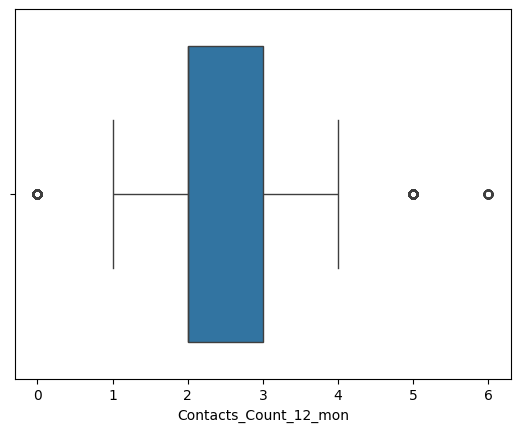

In [18]:
#plotting boxplot for Contacts_Count_12_mon
sns.boxplot(data,x='Contacts_Count_12_mon')

### Observations 

- Median is somewhere in between 2 and 3
- There are outliers since in some cases there can more contacts for any enquiry related to certain product
- But having 0 contacts might also lose business for the bank

<Axes: xlabel='Credit_Limit'>

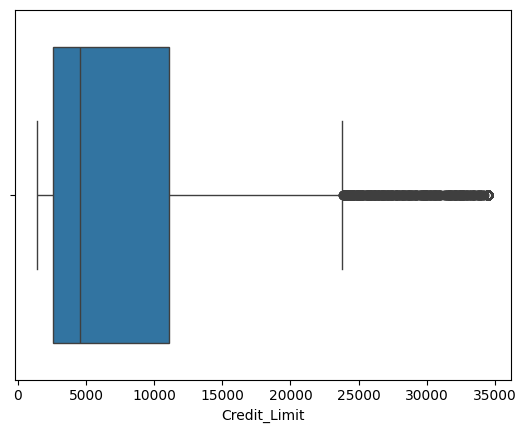

In [19]:
#plotting boxplot for Credit_Limit
sns.boxplot(data,x='Credit_Limit')

###  Observations 

- Most customers have credit limit less than 12000
- There are outliers suggesting some customers are high credit limit which might be justified based on their income

<Axes: xlabel='Total_Revolving_Bal'>

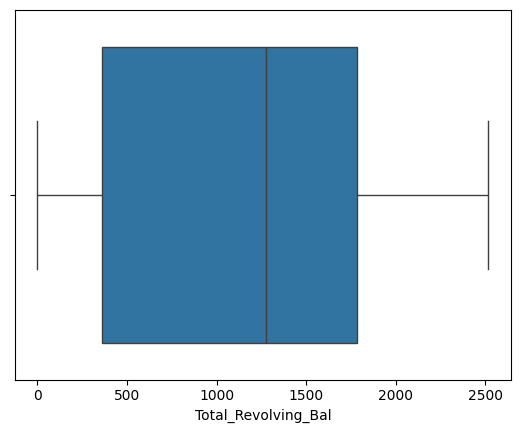

In [20]:
#plotting boxplot for Total_Revolving_Bal
sns.boxplot(data,x='Total_Revolving_Bal')

### Observations 

- The column is left-skewed meaning most of customers have good amount of balanced to be carried forward to next month
- There are no outliers 

<Axes: xlabel='Avg_Open_To_Buy'>

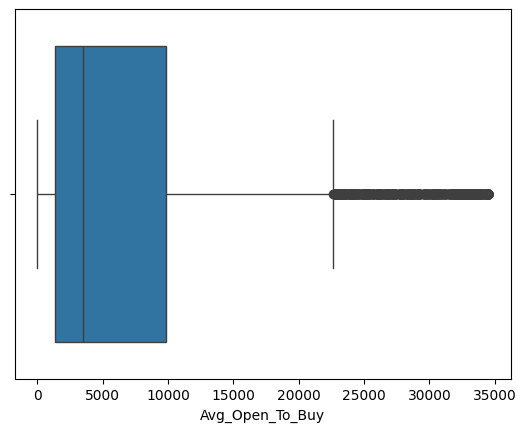

In [21]:
#plotting boxplot for Avg_Open_To_Buy
sns.boxplot(data,x='Avg_Open_To_Buy')

### Observations 

- The data is right skewed and most customers have little balance left on their credit card 
- There are many outliers whih is justified since some customers can have more balance left to be used

<Axes: xlabel='Total_Trans_Amt'>

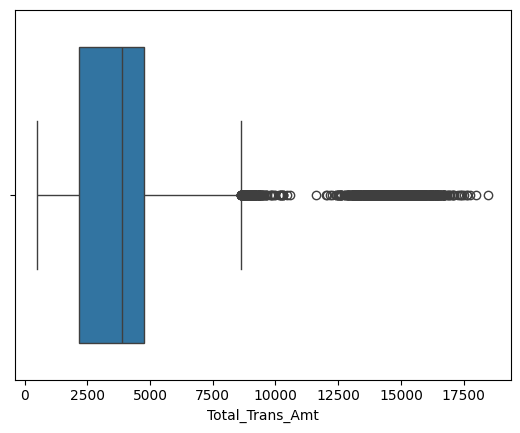

In [22]:
#plotting boxplot for Total_Trans_Amt
sns.boxplot(data,x='Total_Trans_Amt')

### Observations 

- The column seems right skewed with some customers having less transaction amount on credit card
- There are outliers suggesting some customers have spent more on credit card

<Axes: xlabel='Total_Trans_Ct'>

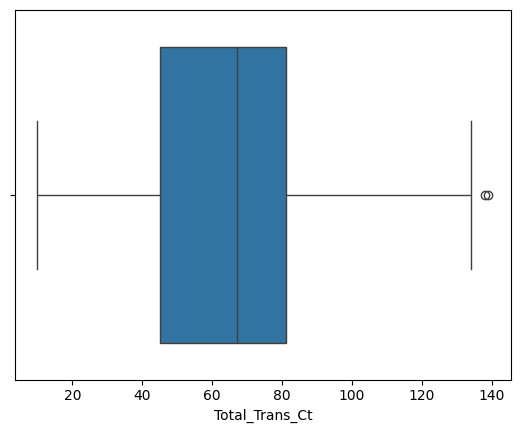

In [23]:
#plotting boxplot for Total_Tans_Ct
sns.boxplot(data,x='Total_Trans_Ct')

### Observations 

- The column seems mindly right-skewed with more customers having less number of transactions
- The outliers suggest that there are customers with high number of transactions count

<Axes: xlabel='Total_Ct_Chng_Q4_Q1', ylabel='Count'>

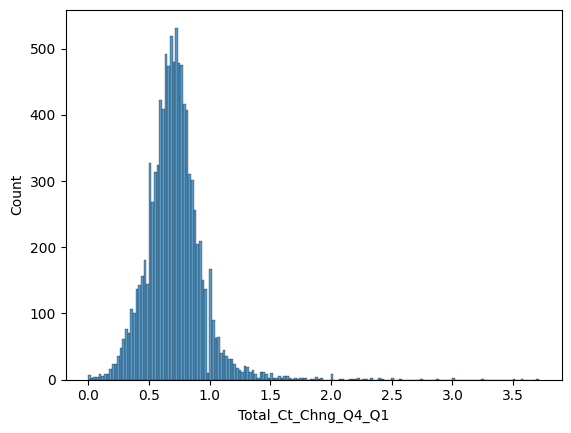

In [24]:
#plotting histogram for Total_Ct_Chng_Q4_Q1
sns.histplot(data,x='Total_Ct_Chng_Q4_Q1')


### Observations 

- Most of the customers have the ratio less than 1
- Looks like there are outliers suggesting that customers spend more in one of the quarters suggesting a good time to suggest products to them

<Axes: xlabel='Total_Amt_Chng_Q4_Q1', ylabel='Count'>

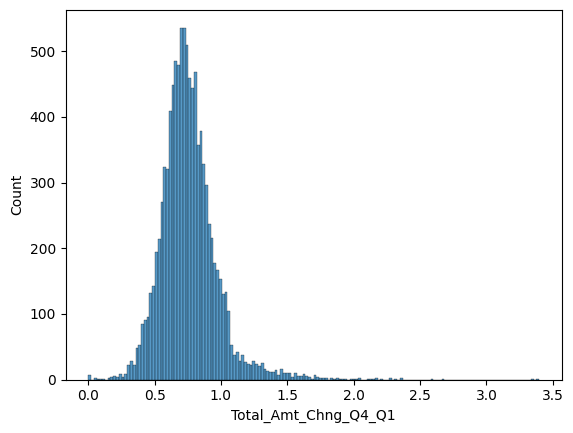

In [25]:
#plotting histogram for Total_Amt_Chng_Q4_Q1
sns.histplot(data,x='Total_Amt_Chng_Q4_Q1')


### Observations 

- Most of Customers have a ratio of amount of less 1.3 suggesting a balanced expenditure
- There are outliers suggesting that some customers spend more in either of the quarters suggesting a time to sell products to them

<Axes: xlabel='Avg_Utilization_Ratio', ylabel='Count'>

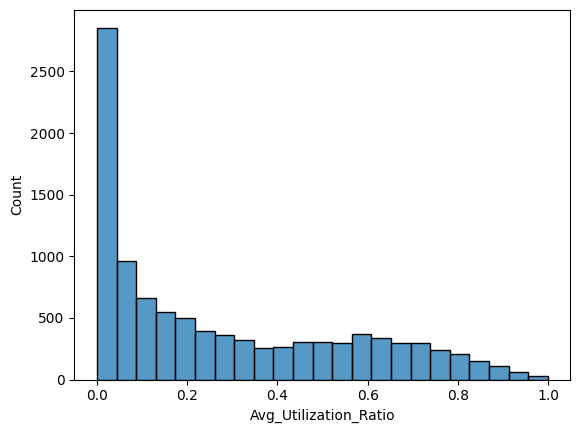

In [26]:
#plotting histogram for Avg_Utilization_Ratio
sns.histplot(data,x='Avg_Utilization_Ratio')


### Observations 

- The column looks right skewed which most of the data on the left side of the median
- No outliers can seem visibly suggesting that customers are not overspending and utilizing efficiently

## EDA - Bivariate and Multivariate Analysis

<Axes: xlabel='Customer_Age', ylabel='Dependent_count'>

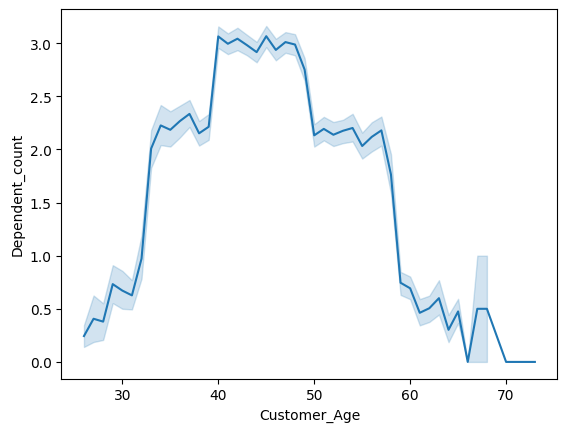

In [27]:
#plotting lineplot for customer_age vs dependent_count 
sns.lineplot(data,x='Customer_Age',y='Dependent_count')

### Observations 

- Customers in the range of 40 to 50 have nearly 3 dependents
- Customers from 35 to 40 and 50 to 57 have nearly 2 dependents 
- Others have 1 or even 0 dependents 

This would help in gauging the credit card assessment whether the customer would be in a state to repay any balance payments

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17040\2757744307.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data,y='Income_Category',x='Credit_Limit',palette='bright')


<Axes: xlabel='Credit_Limit', ylabel='Income_Category'>

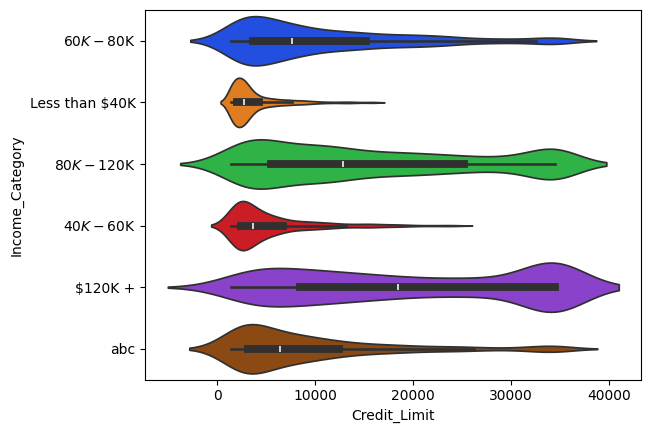

In [28]:
#plotting violit plot for income_category vs credit_limit
sns.violinplot(data,y='Income_Category',x='Credit_Limit',palette='bright')

### Observations 

- Customers with 'Less thn $40K' have very less credit limit with median close to 0 itself.
- Customers with '40K to 60K' have little more credit limit, with median also more than the above.
- Customers with '60 to 80K' have an increased median credit limit than the above with more customers have a less credit limit
- Customers with '80 to 120K' have a more increased median credit limit, with still many customers having less credit limit as compared to ones having higher
- Customers with '120K+' have  most customers with high credit limit and a substancial number of low credit limit customers as well 
- The category 'abc' have varied range of customers and the values can be imputed using KNN imputer.

This would help in gauging whether a customer would default on payments or make payments based on the income category and credit limit

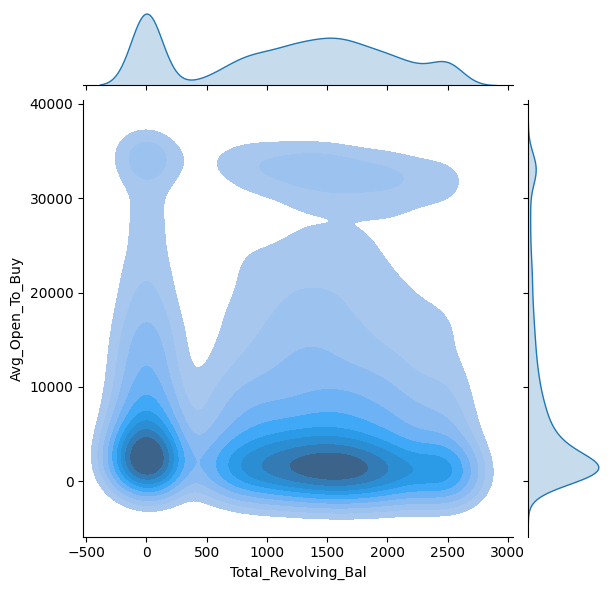

In [29]:
#plotting for total_revolving_balance vs avg_open_to_buy
sns.jointplot(data,x='Total_Revolving_Bal',y='Avg_Open_To_Buy',kind='kde',fill=True)

### Observations 

- Most Customers have less avg_open_to_buy even if they have total_revolving_bal high
- Certain customers have more ave_open_to_buy even if the revolving balance is low 
- Certain customers have high avg_open_to_buy with a high revolving balance who are a great fit for the credit card

This helps in gauging the spending trends for a user

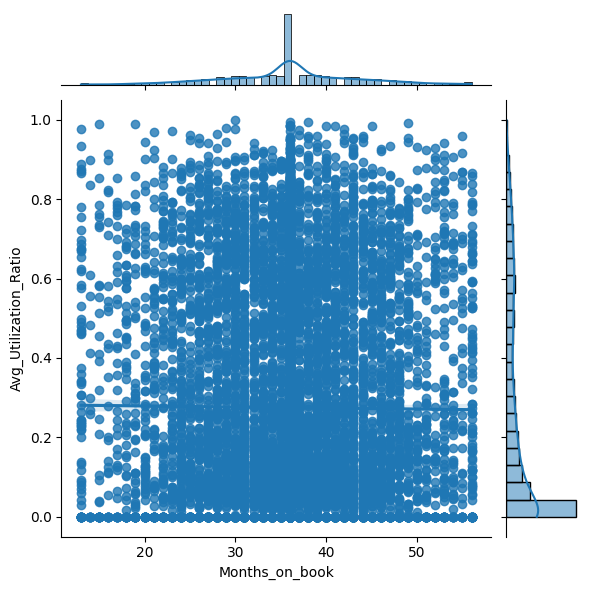

In [30]:
#plotting jointplot for months_on_book vs avg_utilization_ratio

sns.jointplot(data,x='Months_on_book',y='Avg_Utilization_Ratio',kind='reg') 

### Observations 

- There are bunch of varied customers in the list
- The target customers are who have high average utilization and high months on book are the ideal customers to be considered for the credit card as those have least possibility to default on payments
- The customers which have high average utilization but are newly onboarded can also be considered for the credit card applications

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 76.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 72.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 25.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Marital_Status', ylabel='Total_Revolving_Bal'>

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 82.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 79.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 33.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


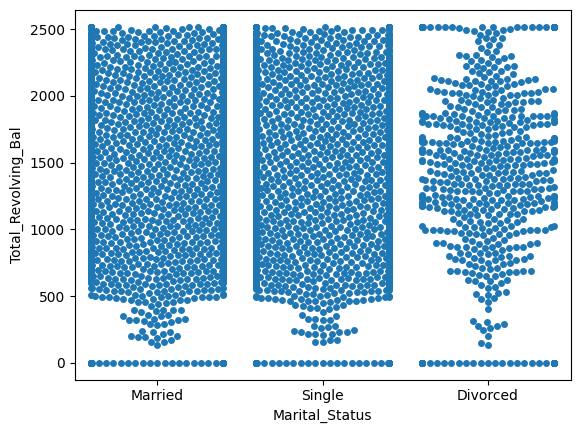

In [31]:
#plotting swarmplot for marital_status vs total revovling balance
sns.swarmplot(data,x='Marital_Status',y='Total_Revolving_Bal')

### Observations 

- Customers who are single and married have pretty similar revolving balance and are likely to store more money
- Customers who are divorce have less revolving balance and potentially could default on credit ccard payments hence are less likely to be given credit cards

<Axes: xlabel='Total_Ct_Chng_Q4_Q1', ylabel='Total_Amt_Chng_Q4_Q1'>

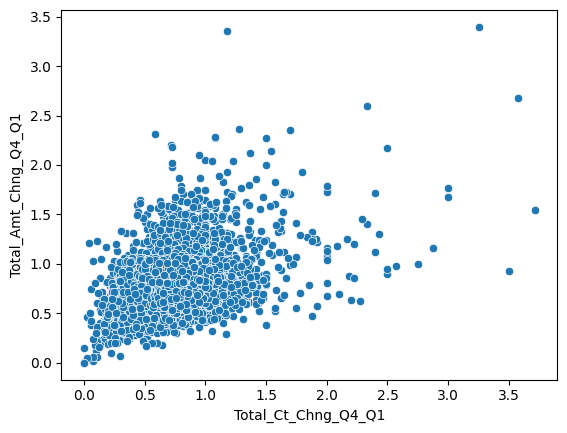

In [32]:
#plotting scatterplot for Ratio of total transaction amount and count ratio in q4 and q1
sns.scatterplot(data,x='Total_Ct_Chng_Q4_Q1',y='Total_Amt_Chng_Q4_Q1')

### Observations 

- Most of the customers have more transaction amount and count in 4th quarter as compared to 1st quarter
- Ideal customers are those which save even after the 4th quarter who would least likely default on payments
- However, we could also consider people who have less ratio of count, as they would have less payments to be made in the 4th quarter resulting in less default on credit card payments 

<Axes: xlabel='Card_Category', ylabel='Total_Relationship_Count'>

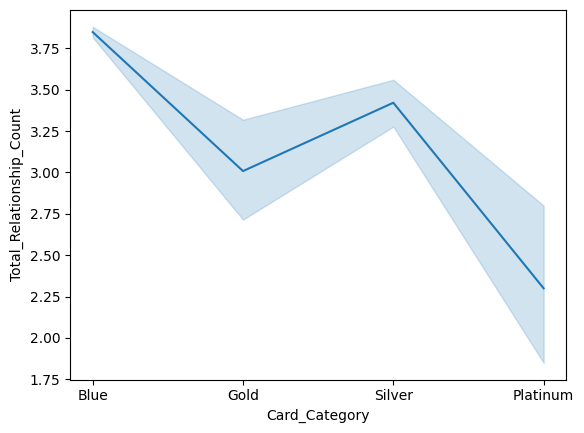

In [33]:
#plotting lineplot for income ccategory and card category
sns.lineplot(data,x='Card_Category',y='Total_Relationship_Count')

### Observations 

- Customers which have the Blue card have most of bank products while Platinum has the least.
- The Card Category could be sold with a Product to increase the sales drastically thereby offfering customer a better card with another product
- Gold and Silver card customers have potential of buying more products, hence should have good marketing strategies to sell the products

<Axes: >

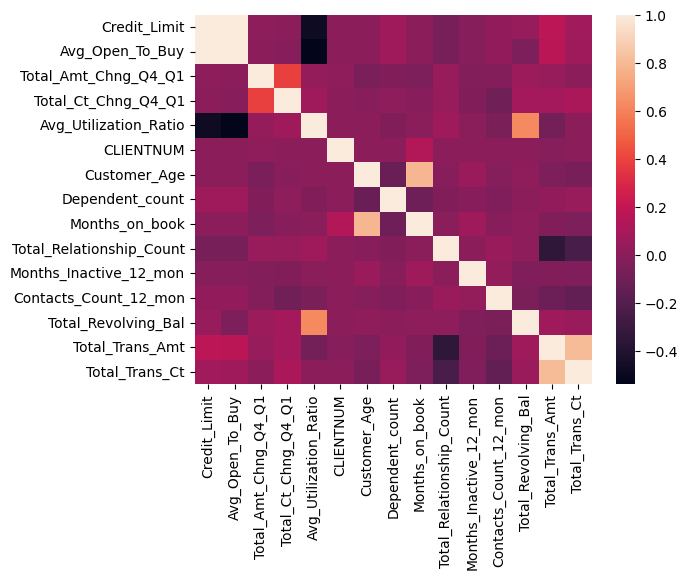

In [34]:
#plotting heatmap to see the corelation
sns.heatmap(data = data[['Credit_Limit','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio','CLIENTNUM','Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Revolving_Bal','Total_Trans_Amt','Total_Trans_Ct']].corr())

### Observations 

- Total_Ct_Chng_Q4_Q1 has good positive correlation with Total_Amt_Chng_Q4_Q1 compraed to rest
- Avg_Utilization_Ratio and Credit Limit has a negative correlation which might excellent for modelling
- Avg_Utilization_Ratio and Total_Revolving_Ratio have descent positive correlation.
- Rest have nearly zero correlation which is something which should be considered during modelling to find patterns

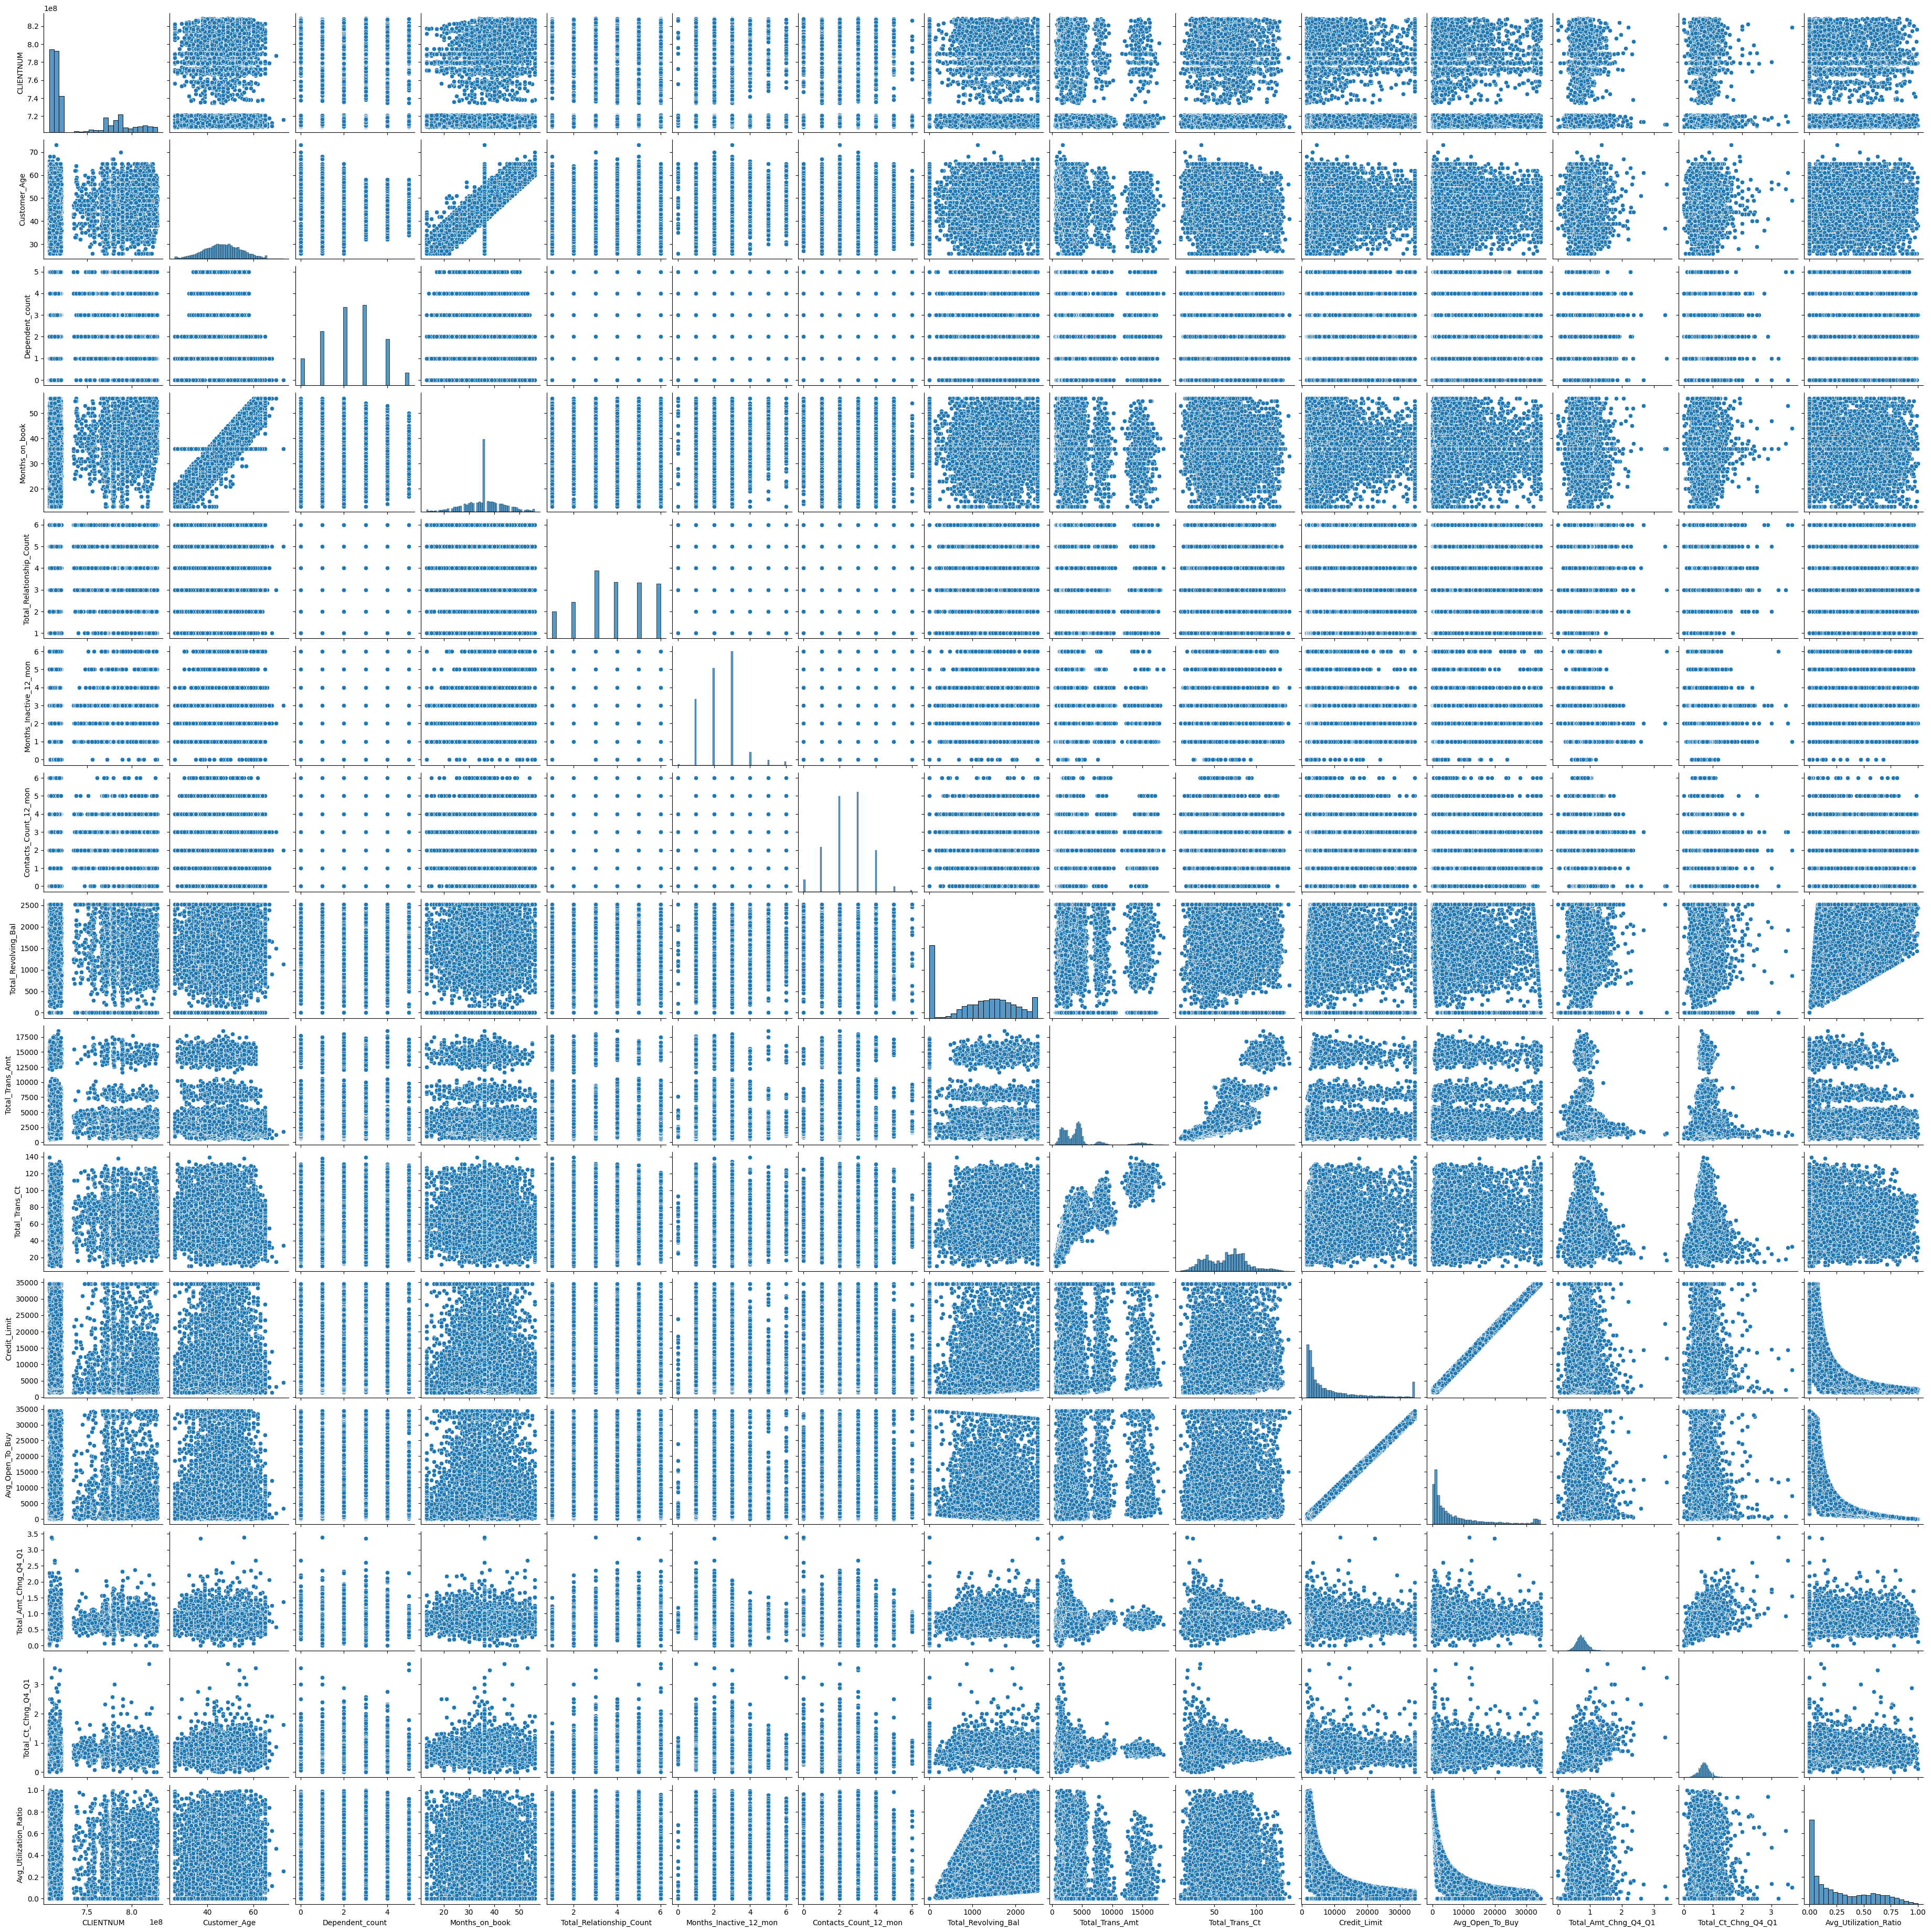

In [35]:
#plotting pairplot to find relations
sns.pairplot(data = data[['CLIENTNUM','Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Revolving_Bal','Total_Trans_Amt','Total_Trans_Ct','Credit_Limit','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']])

### Observations 

- Avg_Open_To_Buy and Credit Limit has a good linear relationship
- Avg_Utilization_Ration and Credit Limit looks to have a negative correlation 
- A lot of the variables have shown a varied relationship some non-linear, some scattered and some sparse 

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17040\3528297366.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data,x='Months_Inactive_12_mon',y='Total_Trans_Amt',hue='Income_Category',ci=False)


<Axes: xlabel='Months_Inactive_12_mon', ylabel='Total_Trans_Amt'>

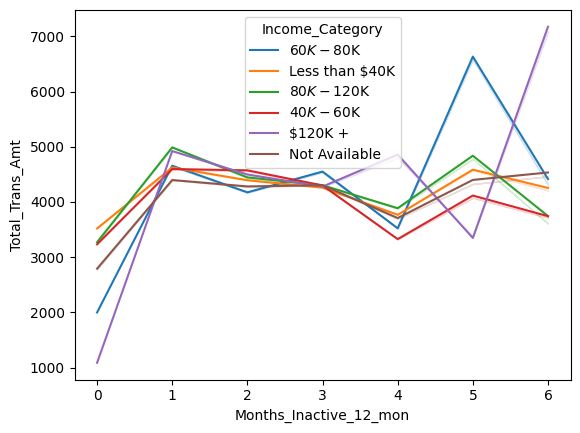

In [151]:
#plotting lineplot for income_category vs total_trans_amt vs months_inactive_12

sns.lineplot(data,x='Months_Inactive_12_mon',y='Total_Trans_Amt',hue='Income_Category',ci=False)

### Observations

- For customers who are inactive for 1-3 months for nearly all categories have the similar transaction amount. 
- For customers less than 1 month inactive have  shown very less transaction amount.
- For customers having more than 4 months of inactivity have shown varied range of total transaction amount thereby giving clarity on the target market
- Customers having 60K-80K and 120K+ income with 4-6 months of inactivity could be the ideal customers based on the transaction and spending nature.

## Feature Engineering

In [36]:
#check for null values
data.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

### Observations 

- There are null values in the Education and Marital Status which can be dealt by replacing the null values with 'Not Available'
- Similarly with value - 'abc' in Income_Category value can be dealth by replacing the null values with 'Not Available'

In [37]:
#replacing the null values & 'abc' in income category
data['Education_Level'] = data['Education_Level'].fillna('Not Available')
data['Marital_Status'] = data['Marital_Status'].fillna('Not Available')
data['Income_Category'] = data['Income_Category'].replace ('abc','Not Available')

In [38]:
#checking for any duplicates
data.duplicated().sum()

0

### Observations 

- There are no duplicate values present in the data

In [39]:
#dropping of unnecessary columns
dropped_data = data.drop(columns = 'CLIENTNUM',axis=1)

### Observations

- CLIENTNUM is a variable not important for the model to learn to predict for the application of credit card 

In [40]:
#convert certain columns to float since they might require some pre-processing 
data[['Total_Revolving_Bal', 'Total_Trans_Amt','Total_Trans_Ct']] = data[['Total_Revolving_Bal', 'Total_Trans_Amt','Total_Trans_Ct']].astype(float)

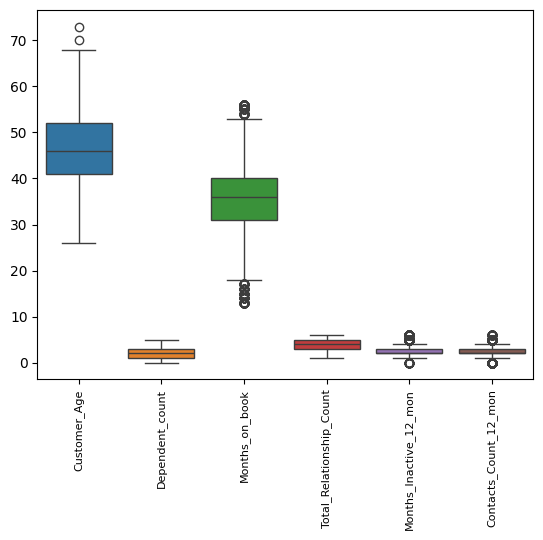

In [41]:
#integer columns outliers removal after plotting box plots
integer_columns = ['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon']


#plotting of box plots
sns.boxplot(data=dropped_data[integer_columns])
plt.xticks(rotation = 90,fontsize = 8);



### Observations 

- Customer_Age - Outliers here cannot be treated since cutomers can be of varied age
- Dependent Count - Has no outliers
- Months_on_book - Outliers cannot be removed since customers could a new as well as old customers
- Total_Relationsip_Count - No outliers
- Months_Inactive_12_mon - Outliers should be treated by making the inactive customers more active through discounts on bank products
- Contacts_Count_12_mon - Outliers should be treated by making the inactive customers more active through interactions with bank associates

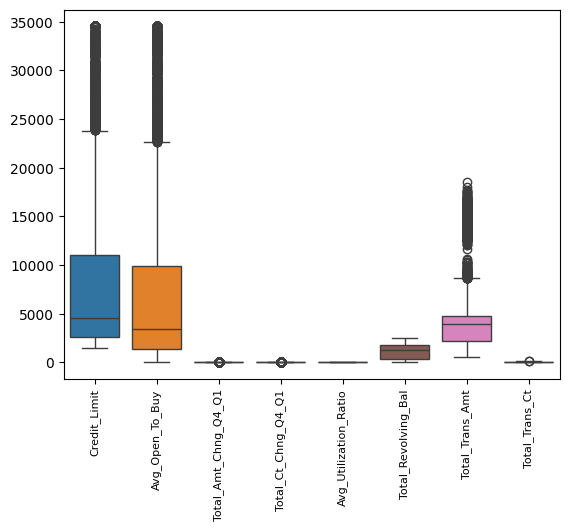

In [42]:
#float columns outliers removal after plotting box plots
float_columns = ['Credit_Limit','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio','Total_Revolving_Bal',
                   'Total_Trans_Amt','Total_Trans_Ct']

#plotting of box plots
sns.boxplot(data = dropped_data[float_columns])
plt.xticks(rotation = 90,fontsize = 8);

### Observations 

- Credit_ Limit - Outliers are bound to be there since based credit limit is set based on various data factors includeing income_category
- Avg_Open_To_Buy - Outliers are bound since each customer is different and can have different values left to be used on the credit card
- Total_Revolving_Bal - There are no outliers
- Total_Amt_Chng_Q4_Q1, Total_Ct_Chng_Q4_Q1, Total_Trans_Ct, Total_Trans_Amt - The outliers present depends on the customer spends and not on any external factors

In [51]:
#scaling of the data 
from scipy.stats import zscore

num_columns = ['Credit_Limit','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio','Total_Revolving_Bal',
                   'Total_Trans_Amt','Total_Trans_Ct','Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon']

dropped_data[num_columns] = dropped_data[num_columns].apply(zscore)

In [44]:
dropped_data

Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      Existing Customer     -0.165406      M         0.503368   
1      Existing Customer      0.333570      F         2.043199   
2      Existing Customer      0.583058      M         0.503368   
3      Existing Customer     -0.789126      F         1.273283   
4      Existing Customer     -0.789126      M         0.503368   
...                  ...           ...    ...              ...   
10122  Existing Customer      0.458314      M        -0.266547   
10123  Attrited Customer     -0.664382      M        -0.266547   
10124  Attrited Customer     -0.290150      F        -1.036462   
10125  Attrited Customer     -2.036565      M        -0.266547   
10126  Attrited Customer     -0.414894      F        -0.266547   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School  Not Available  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123   Not Available       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate  Not Available     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0            0.384621                  0.763943               -1.327136   
1            1.010715                  1.407306               -1.327136   
2            0.008965                  0.120579               -1.327136   
3           -0.241473                 -0.522785                1.641478   
4           -1.869317                  0.763943               -1.327136   
...               ...                       ...                     ...   
10122        0.509840                 -0.522785               -0.337598   
10123       -1.368442                  0.120579               -0.337598   
10124        0.008965                  0.763943                0.651940   
10125        0.008965                  0.120579                0.651940   
10126       -1.368442                  1.407306               -0.337598   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                   0.492404      0.446622            -0.473422   
1                  -0.411616     -0.041367            -0.366667   
2                  -2.219655     -0.573698            -1.426858   
3                  -1.315636     -0.585251             1.661686   
4                  -2.219655     -0.430877            -1.426858   
...                      ...           ...                  ...   
10122               0.492404     -0.509330             0.844455   
10123               0.492404     -0.479181             1.255524   
10124               1.396424     -0.354626            -1.426858   
10125               0.492404     -0.368710            -1.426858   
10126               1.396424      0.193220             0.979433   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0             0.488971              2.623494        -0.959707       -0.973895   
1            -0.008486              3.563293        -0.916433       -1.357340   
2            -0.445658              8.367214        -0.740982       -1.911206   
3            -0.734100              2.942843        -0.951758       -1.911206   
4            -0.302868              6.455682        -1.056263       -1.570365   
...                ...                   ...              ...             ...   
10122        -0.584929             -0.259771         3.259358        2.221481   
10123        -0.591639

In [52]:
#splitting target variable and converting categorical variables to dummy
X  = dropped_data.drop (columns = ['Attrition_Flag'], axis=1)
y = dropped_data["Attrition_Flag"].apply(lambda x: 1 if x == "Existing Customer" else 0)

X_final = pd.get_dummies(X,drop_first=True)

In [53]:
#splitting the data into train, validation and test split
from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=1, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 32) (2026, 32) (2026, 32)


## Model Building - Original Data

We would have to keep **Recall** metric since the customers defaulting on payments given a credit card would mean a higher loss 

Therefore Recall should have a higher number to reduce the false negatives as much as possible

In [79]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score,recall_score,accuracy_score,precision_score, make_scorer

models = []
scorer =make_scorer(recall_score)

# Appending models into the list
models.append(["Bagging_Classifier", BaggingClassifier(random_state=1)])
models.append(["Random_Forest", RandomForestClassifier(random_state=1)])
models.append(["GB_Classifier", GradientBoostingClassifier(random_state=1)])
models.append(["Adaboost_Classifier", AdaBoostClassifier(random_state=1)])
models.append(["DecisionTree_Classifier", DecisionTreeClassifier(random_state=1)])

results = []
names = []

#finding the mean cross validation scores
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring = scorer,cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))
    



Cross-Validation performance on training dataset:

Bagging_Classifier: 0.9743116088437338
Random_Forest: 0.9868612057187939
GB_Classifier: 0.9878412130308453


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default)

Adaboost_Classifier: 0.9792122226712078
DecisionTree_Classifier: 0.9607783486309145


In [82]:
#training of the models 

def evaluation_metrics(model,name,X,y,i,j):
    model.fit(X,y)
    models[i][j] = model
    evaluation_metrics = pd.DataFrame(
    {"Model":name,"Accuracy": accuracy_score(y,model.predict(X)), "Recall": recall_score(y,model.predict(X)), "Precision": precision_score(y,model.predict(X)), "F1": f1_score(y,model.predict(X)),},
     index=[0],
    )

    return evaluation_metrics


#finding the training scores
print("\n" "Training Performance:" "\n")

models_train_comp_df = pd.concat(
    [
        evaluation_metrics(models[0][1],models[0][0],X_train,y_train,0,1).T,
        evaluation_metrics(models[1][1],models[1][0],X_train,y_train,1,1).T,
        evaluation_metrics(models[2][1],models[2][0],X_train,y_train,2,1).T,
        evaluation_metrics(models[3][1],models[3][0],X_train,y_train,3,1).T,
        evaluation_metrics(models[4][1],models[4][0],X_train,y_train,4,1).T,
    ],
    
    axis=1,)

print("Training performance comparison:")
models_train_comp_df


Training Performance:



c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training performance comparison:


0              0              0  \
Model      Bagging_Classifier  Random_Forest  GB_Classifier   
Accuracy             0.997202            1.0       0.978272   
Recall               0.997647            1.0       0.992744   
Precision            0.999018            1.0       0.981578   
F1                   0.998332            1.0       0.987129   

                             0                        0  
Model      Adaboost_Classifier  DecisionTree_Classifier  
Accuracy              0.961317                      1.0  
Recall                0.982546                      1.0  
Precision             0.971683                      1.0  
F1                    0.977084                      1.0

In [83]:
#validation of the models 
def evaluation_metrics(model,name,X,y):
    evaluation_metrics = pd.DataFrame(
    {"Model":name,"Accuracy": accuracy_score(y,model.predict(X)), "Recall": recall_score(y,model.predict(X)), "Precision": precision_score(y,model.predict(X)), "F1": f1_score(y,model.predict(X)),},
     index=[0],
    )

    return evaluation_metrics


#finding the validation scores
print("\n" "Validation Performance:" "\n")

models_train_comp_df = pd.concat(
    [
        evaluation_metrics(models[0][1],models[0][0],X_val,y_val).T,
        evaluation_metrics(models[1][1],models[1][0],X_val,y_val).T,
        evaluation_metrics(models[2][1],models[2][0],X_val,y_val).T,
        evaluation_metrics(models[3][1],models[3][0],X_val,y_val).T,
        evaluation_metrics(models[4][1],models[4][0],X_val,y_val).T,
    ],
    
    axis=1,)

print("Validation performance comparison:")
models_train_comp_df


Validation Performance:

Validation performance comparison:


0              0              0  \
Model      Bagging_Classifier  Random_Forest  GB_Classifier   
Accuracy             0.951135       0.940276       0.961994   
Recall               0.978235       0.985294       0.989412   
Precision            0.964058       0.945793       0.966111   
F1                   0.971095        0.96514       0.977623   

                             0                        0  
Model      Adaboost_Classifier  DecisionTree_Classifier  
Accuracy              0.955084                 0.931392  
Recall                0.982353                 0.964706  
Precision              0.96476                 0.954043  
F1                    0.973477                 0.959345

In [84]:
#testing of the models 
def evaluation_metrics(model,name,X,y):
    evaluation_metrics = pd.DataFrame(
    {"Model":name,"Accuracy": accuracy_score(y,model.predict(X)), "Recall": recall_score(y,model.predict(X)), "Precision": precision_score(y,model.predict(X)), "F1": f1_score(y,model.predict(X)),},
     index=[0],
    )

    return evaluation_metrics


#finding the testing scores
print("\n" "Testing Performance:" "\n")

models_train_comp_df = pd.concat(
    [
        evaluation_metrics(models[0][1],models[0][0],X_test,y_test).T,
        evaluation_metrics(models[1][1],models[1][0],X_test,y_test).T,
        evaluation_metrics(models[2][1],models[2][0],X_test,y_test).T,
        evaluation_metrics(models[3][1],models[3][0],X_test,y_test).T,
        evaluation_metrics(models[4][1],models[4][0],X_test,y_test).T,
    ],
    
    axis=1,)

print("Testing performance comparison:")
models_train_comp_df


Testing Performance:

Testing performance comparison:


0              0              0  \
Model      Bagging_Classifier  Random_Forest  GB_Classifier   
Accuracy             0.954097       0.944225       0.966436   
Recall               0.976484       0.987654       0.992357   
Precision            0.969078       0.948081       0.968445   
F1                   0.972767       0.967463       0.980256   

                             0                        0  
Model      Adaboost_Classifier  DecisionTree_Classifier  
Accuracy              0.957058                 0.937315  
Recall                0.980012                 0.967078  
Precision             0.969186                 0.958625  
F1                    0.974569                 0.962833

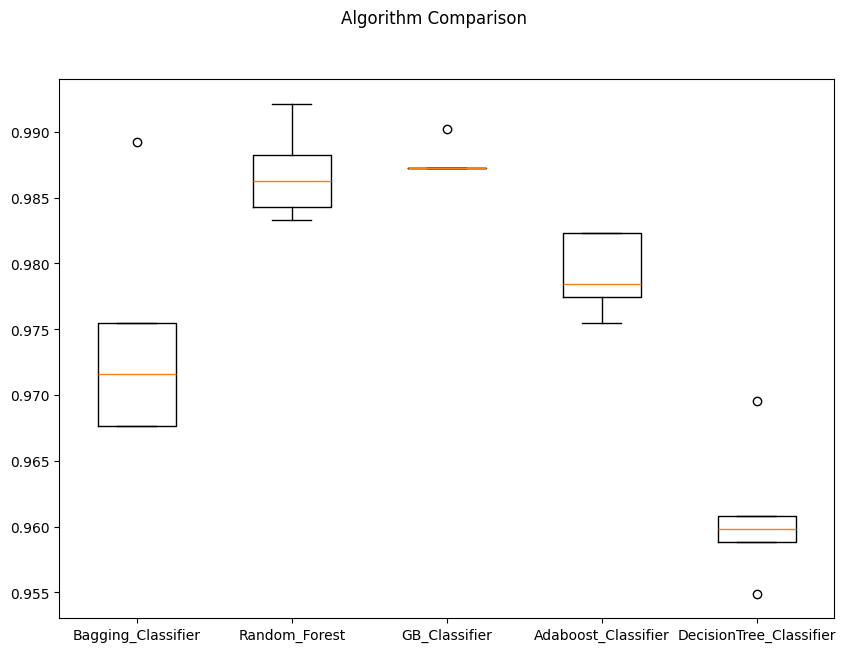

In [85]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

### Observations

- In all the cases with validation and testing data there is not much difference with the accuracy or recall of the training data, therefore the model is neither overfit nor underfit
- Since the paramter, we aim to increase with the most is recall, GBClassifier has given the best recall and accuracy for test and validation  datasets
- The second best model to be considered could be AdaBoost Classifier since it has the second best accuracy and f1 score, with good recall.
- We can see that GB Classifier and Random Forest have given nearly same cross validated recall score but once we fit the entire training data, we get the recall score of GBClassifier to be better
- However, hyperparameters could help in getting better values

## Model Building - Oversample data

In [94]:
#oversampling of the data
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='auto',k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_over == 0)))

Before OverSampling, count of label '1': 5099
Before OverSampling, count of label '0': 976 

After OverSampling, count of label '1': 5099
After OverSampling, count of label '0': 5099 



In [89]:
#stratifies K-fold Cross Validation
models = []
scorer =make_scorer(recall_score)

# Appending models into the list
models.append(["Bagging_Classifier", BaggingClassifier(random_state=1)])
models.append(["Random_Forest", RandomForestClassifier(random_state=1)])
models.append(["GB_Classifier", GradientBoostingClassifier(random_state=1)])
models.append(["Adaboost_Classifier", AdaBoostClassifier(random_state=1)])
models.append(["DecisionTree_Classifier", DecisionTreeClassifier(random_state=1)])

results = []
names = []

#finding the mean cross validation scores
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring = scorer,cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))
    



Cross-Validation performance on training dataset:

Bagging_Classifier: 0.9543064134387809
Random_Forest: 0.9696022628874907
GB_Classifier: 0.9658763878466008


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default)

Adaboost_Classifier: 0.9494025284304104
DecisionTree_Classifier: 0.9407754622948297


In [90]:
#training of the models 

def evaluation_metrics(model,name,X,y,i,j):
    model.fit(X,y)
    models[i][j] = model
    evaluation_metrics = pd.DataFrame(
    {"Model":name,"Accuracy": accuracy_score(y,model.predict(X)), "Recall": recall_score(y,model.predict(X)), "Precision": precision_score(y,model.predict(X)), "F1": f1_score(y,model.predict(X)),},
     index=[0],
    )

    return evaluation_metrics


#finding the training scores
print("\n" "Training Performance:" "\n")

models_train_comp_df = pd.concat(
    [
        evaluation_metrics(models[0][1],models[0][0],X_train_over,y_train_over,0,1).T,
        evaluation_metrics(models[1][1],models[1][0],X_train_over,y_train_over,1,1).T,
        evaluation_metrics(models[2][1],models[2][0],X_train_over,y_train_over,2,1).T,
        evaluation_metrics(models[3][1],models[3][0],X_train_over,y_train_over,3,1).T,
        evaluation_metrics(models[4][1],models[4][0],X_train_over,y_train_over,4,1).T,
    ],
    
    axis=1,)

print("Training performance comparison:")
models_train_comp_df


Training Performance:



c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training performance comparison:


0              0              0  \
Model      Bagging_Classifier  Random_Forest  GB_Classifier   
Accuracy             0.997352            1.0       0.978035   
Recall               0.995489            1.0       0.974113   
Precision            0.999213            1.0       0.981815   
F1                   0.997347            1.0       0.977948   

                             0                        0  
Model      Adaboost_Classifier  DecisionTree_Classifier  
Accuracy              0.960581                      1.0  
Recall                0.953324                      1.0  
Precision             0.967363                      1.0  
F1                    0.960292                      1.0

In [91]:
#validation of the models 
def evaluation_metrics(model,name,X,y):
    evaluation_metrics = pd.DataFrame(
    {"Model":name,"Accuracy": accuracy_score(y,model.predict(X)), "Recall": recall_score(y,model.predict(X)), "Precision": precision_score(y,model.predict(X)), "F1": f1_score(y,model.predict(X)),},
     index=[0],
    )

    return evaluation_metrics


#finding the validation scores
print("\n" "Validation Performance:" "\n")

models_train_comp_df = pd.concat(
    [
        evaluation_metrics(models[0][1],models[0][0],X_val,y_val).T,
        evaluation_metrics(models[1][1],models[1][0],X_val,y_val).T,
        evaluation_metrics(models[2][1],models[2][0],X_val,y_val).T,
        evaluation_metrics(models[3][1],models[3][0],X_val,y_val).T,
        evaluation_metrics(models[4][1],models[4][0],X_val,y_val).T,
    ],
    
    axis=1,)

print("Validation performance comparison:")
models_train_comp_df


Validation Performance:

Validation performance comparison:


0              0              0  \
Model      Bagging_Classifier  Random_Forest  GB_Classifier   
Accuracy             0.936821       0.947187       0.957552   
Recall               0.951765       0.974118           0.97   
Precision            0.972356       0.963351       0.979216   
F1                    0.96195       0.968704       0.974586   

                             0                        0  
Model      Adaboost_Classifier  DecisionTree_Classifier  
Accuracy              0.944225                 0.920039  
Recall                0.951765                 0.947059  
Precision             0.981201                 0.957194  
F1                    0.966259                 0.952099

In [92]:
#testing of the models 
def evaluation_metrics(model,name,X,y):
    evaluation_metrics = pd.DataFrame(
    {"Model":name,"Accuracy": accuracy_score(y,model.predict(X)), "Recall": recall_score(y,model.predict(X)), "Precision": precision_score(y,model.predict(X)), "F1": f1_score(y,model.predict(X)),},
     index=[0],
    )

    return evaluation_metrics


#finding the testing scores
print("\n" "Testing Performance:" "\n")

models_train_comp_df = pd.concat(
    [
        evaluation_metrics(models[0][1],models[0][0],X_test,y_test).T,
        evaluation_metrics(models[1][1],models[1][0],X_test,y_test).T,
        evaluation_metrics(models[2][1],models[2][0],X_test,y_test).T,
        evaluation_metrics(models[3][1],models[3][0],X_test,y_test).T,
        evaluation_metrics(models[4][1],models[4][0],X_test,y_test).T,
    ],
    
    axis=1,)

print("Testing performance comparison:")
models_train_comp_df


Testing Performance:

Testing performance comparison:


0              0              0  \
Model      Bagging_Classifier  Random_Forest  GB_Classifier   
Accuracy              0.94077       0.955084        0.96002   
Recall               0.962963       0.979424       0.974133   
Precision            0.966372        0.96748       0.978158   
F1                   0.964664       0.973415       0.976141   

                             0                        0  
Model      Adaboost_Classifier  DecisionTree_Classifier  
Accuracy              0.947187                 0.934353  
Recall                0.955908                 0.952381  
Precision               0.9807                   0.9689  
F1                    0.968145                 0.960569

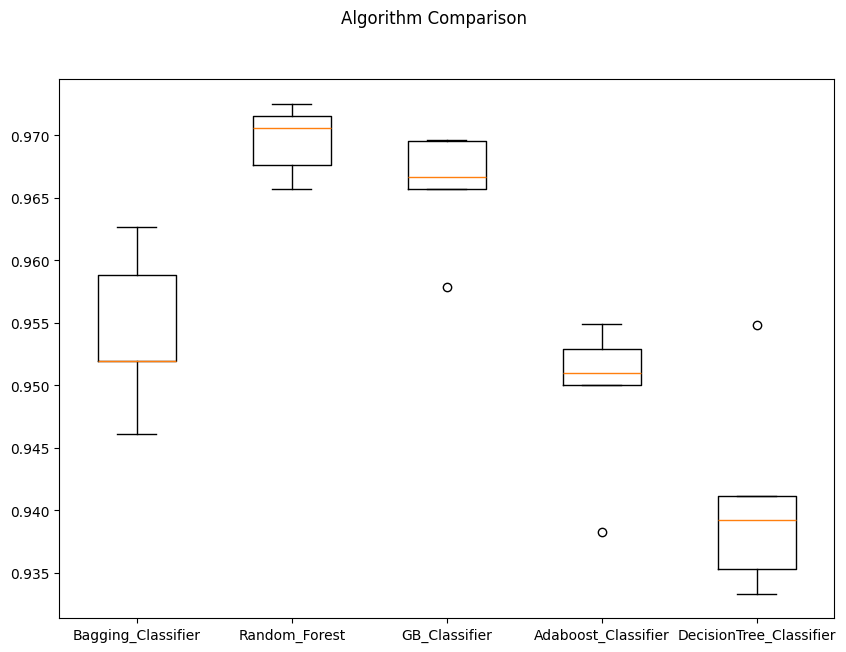

In [93]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

### Observations 

- According to the cross validation recall score, Random Forest has the best recall scores on the oversampled training datasets.
- For the testing and validation datasets, Random Forest has less accuracy but the highest recall. 
- The highest accuracy for testing and validation datasets is by GB Classifier model for oversampled model training.
- F1-score is also higher for the GB Classifier on the testing and validation  when model is trained on oversampled data.

## Model Building - Undersampling

In [96]:
#oversampling of the data
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=1, sampling_strategy = 'auto')
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_un == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_un == 0)))

Before OverSampling, count of label '1': 5099
Before OverSampling, count of label '0': 976 

After OverSampling, count of label '1': 976
After OverSampling, count of label '0': 976 



In [97]:
#stratifies K-fold Cross Validation
models = []
scorer =make_scorer(recall_score)

# Appending models into the list
models.append(["Bagging_Classifier", BaggingClassifier(random_state=1)])
models.append(["Random_Forest", RandomForestClassifier(random_state=1)])
models.append(["GB_Classifier", GradientBoostingClassifier(random_state=1)])
models.append(["Adaboost_Classifier", AdaBoostClassifier(random_state=1)])
models.append(["DecisionTree_Classifier", DecisionTreeClassifier(random_state=1)])

results = []
names = []

#finding the mean cross validation scores
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring = scorer,cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))
    



Cross-Validation performance on training dataset:

Bagging_Classifier: 0.8975614861329146
Random_Forest: 0.9159549973835688
GB_Classifier: 0.9323704866562009


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default)

Adaboost_Classifier: 0.9088121402407117
DecisionTree_Classifier: 0.8790947148090005


In [98]:
#training of the models 

def evaluation_metrics(model,name,X,y,i,j):
    model.fit(X,y)
    models[i][j] = model
    evaluation_metrics = pd.DataFrame(
    {"Model":name,"Accuracy": accuracy_score(y,model.predict(X)), "Recall": recall_score(y,model.predict(X)), "Precision": precision_score(y,model.predict(X)), "F1": f1_score(y,model.predict(X)),},
     index=[0],
    )

    return evaluation_metrics


#finding the training scores
print("\n" "Training Performance:" "\n")

models_train_comp_df = pd.concat(
    [
        evaluation_metrics(models[0][1],models[0][0],X_train_un,y_train_un,0,1).T,
        evaluation_metrics(models[1][1],models[1][0],X_train_un,y_train_un,1,1).T,
        evaluation_metrics(models[2][1],models[2][0],X_train_un,y_train_un,2,1).T,
        evaluation_metrics(models[3][1],models[3][0],X_train_un,y_train_un,3,1).T,
        evaluation_metrics(models[4][1],models[4][0],X_train_un,y_train_un,4,1).T,
    ],
    
    axis=1,)

print("Training performance comparison:")
models_train_comp_df


Training Performance:



c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training performance comparison:


0              0              0  \
Model      Bagging_Classifier  Random_Forest  GB_Classifier   
Accuracy             0.995902            1.0       0.974898   
Recall               0.991803            1.0       0.969262   
Precision                 1.0            1.0       0.980311   
F1                   0.995885            1.0       0.974755   

                             0                        0  
Model      Adaboost_Classifier  DecisionTree_Classifier  
Accuracy              0.946209                      1.0  
Recall                0.940574                      1.0  
Precision             0.951295                      1.0  
F1                    0.945904                      1.0

In [99]:
#validation of the models 
def evaluation_metrics(model,name,X,y):
    evaluation_metrics = pd.DataFrame(
    {"Model":name,"Accuracy": accuracy_score(y,model.predict(X)), "Recall": recall_score(y,model.predict(X)), "Precision": precision_score(y,model.predict(X)), "F1": f1_score(y,model.predict(X)),},
     index=[0],
    )

    return evaluation_metrics


#finding the validation scores
print("\n" "Validation Performance:" "\n")

models_train_comp_df = pd.concat(
    [
        evaluation_metrics(models[0][1],models[0][0],X_val,y_val).T,
        evaluation_metrics(models[1][1],models[1][0],X_val,y_val).T,
        evaluation_metrics(models[2][1],models[2][0],X_val,y_val).T,
        evaluation_metrics(models[3][1],models[3][0],X_val,y_val).T,
        evaluation_metrics(models[4][1],models[4][0],X_val,y_val).T,
    ],
    
    axis=1,)

print("Validation performance comparison:")
models_train_comp_df


Validation Performance:

Validation performance comparison:


0              0              0  \
Model      Bagging_Classifier  Random_Forest  GB_Classifier   
Accuracy             0.919546       0.936821       0.944719   
Recall               0.920588       0.941176       0.948824   
Precision            0.982423       0.982801       0.984737   
F1                   0.950501       0.961538       0.966447   

                             0                        0  
Model      Adaboost_Classifier  DecisionTree_Classifier  
Accuracy              0.923495                   0.9077  
Recall                0.922353                 0.915294  
Precision             0.985544                 0.973108  
F1                    0.952902                 0.943316

In [100]:
#testing of the models 
def evaluation_metrics(model,name,X,y):
    evaluation_metrics = pd.DataFrame(
    {"Model":name,"Accuracy": accuracy_score(y,model.predict(X)), "Recall": recall_score(y,model.predict(X)), "Precision": precision_score(y,model.predict(X)), "F1": f1_score(y,model.predict(X)),},
     index=[0],
    )

    return evaluation_metrics


#finding the testing scores
print("\n" "Testing Performance:" "\n")

models_train_comp_df = pd.concat(
    [
        evaluation_metrics(models[0][1],models[0][0],X_test,y_test).T,
        evaluation_metrics(models[1][1],models[1][0],X_test,y_test).T,
        evaluation_metrics(models[2][1],models[2][0],X_test,y_test).T,
        evaluation_metrics(models[3][1],models[3][0],X_test,y_test).T,
        evaluation_metrics(models[4][1],models[4][0],X_test,y_test).T,
    ],
    
    axis=1,)

print("Testing performance comparison:")
models_train_comp_df


Testing Performance:

Testing performance comparison:


0              0              0  \
Model      Bagging_Classifier  Random_Forest  GB_Classifier   
Accuracy             0.914116       0.934353       0.944719   
Recall               0.912992       0.937684       0.944738   
Precision            0.983534       0.983354       0.988923   
F1                   0.946951       0.959976       0.966326   

                             0                        0  
Model      Adaboost_Classifier  DecisionTree_Classifier  
Accuracy              0.933366                 0.911649  
Recall                 0.92769                 0.917108  
Precision             0.992453                  0.97622  
F1                    0.958979                 0.945741

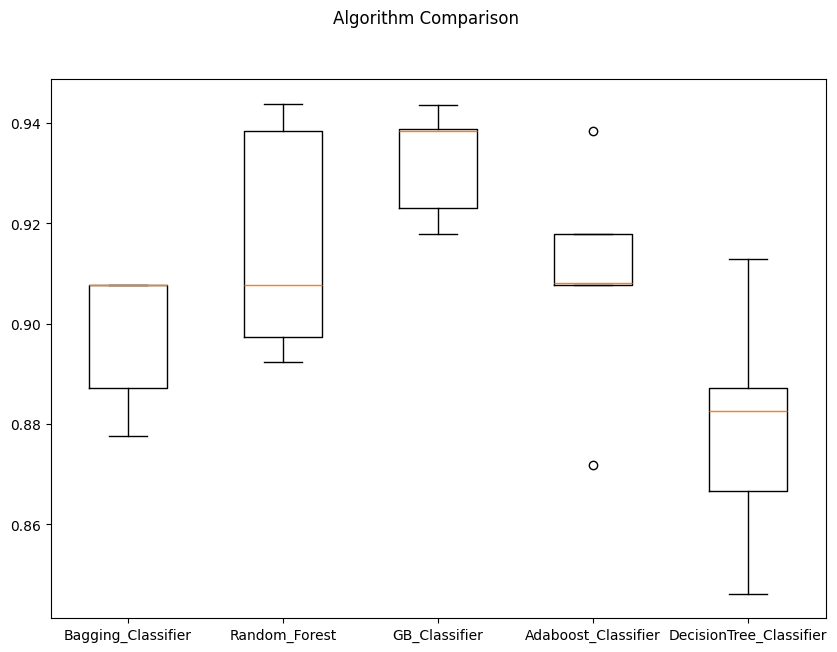

In [101]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

### Observations 

- GB Classifier has shown the best cross validation recall scores on the undersampled training data
- When tested on the validation dataset, ther accuracy and recall are the highest but can be improved through hyperparameter tuning
- Slight overfitting can be seen in the Random Forest Model due to difference in the recall and accuracy score of testing and undersampled training dataets
- When tested on the testing data, GB Classifier has given the best possible results.

## Hyperparameter Tuning 

### Choose of 3 models

- GBClassifier - This has proved to be the best model in the Original and undersampled data and might be better with hyperparameter tuning
- Random Forest - This has proved to be the best model and second best model in oversampled and undersampled respectively and might churn out good results with hyperparameter tuning
- Ada Boost Classifier - This has proved to be second best model with original data and might require hyperparater tuning to be the best model

In [102]:
#define the evaluation metrics
def evalute_metric (model,X,y):
    y_pred = model.predict (X)
    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": accuracy_score(y,y_pred),
            "Recall": recall_score(y,y_pred),
            "Precision": precision_score(y,y_pred),
            "F1": f1_score(y,y_pred),
        },
        index=[0],
    )

    return df_perf

### GB Classifier - Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV
# defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid={"n_estimators": [25,50,75,100], "learning_rate": [0.02,0.1, 0.5, 1], "subsample":[0.2,0.3,0.4,0.5], "max_features":[0.5,0.6,0.7,0.8]}

#Calling RandomizedSearchCV
gridsearch_cv = GridSearchCV(estimator=Model, param_grid=param_grid, scoring=scorer, n_jobs = -1, cv=5)

#Fitting parameters in GridSearchCV
gridsearch_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(gridsearch_cv.best_params_,gridsearch_cv.best_score_))

Best parameters are {'learning_rate': 0.02, 'max_features': 0.5, 'n_estimators': 25, 'subsample': 0.2} with CV score=1.0:


In [109]:
#training of the best model
grid_search_gbm = GradientBoostingClassifier(
    learning_rate=0.02,
    subsample=0.2,
    n_estimators=25,
    max_features=0.5
)

grid_search_gbm.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.02, max_features=0.5,
                           n_estimators=25, subsample=0.2)

In [110]:
#results on the training data
grid_search_gbm_train = evalute_metric(
    grid_search_gbm,X_train,y_train
)
grid_search_gbm_train

Accuracy  Recall  Precision        F1
0  0.839342     1.0   0.839342  0.912654

In [111]:
#results on the validation data
grid_search_gbm_validate = evalute_metric(
    grid_search_gbm,X_val,y_val
)
grid_search_gbm_validate

Accuracy  Recall  Precision        F1
0  0.839092     1.0   0.839092  0.912507

### Observations

- The accuracy has been pretty consistant for training and validation datasets suggesting it has generalized well
- The recall is ~100% which across all the datasets which looks a pretty vague but difficult to say whether the model has overfit or not
- The f1_score has been nearly ~91% across all the datasets suggesting that model has learned well for seen and unseen data.

### GB Classifier - Random Search CV

In [113]:
from sklearn.model_selection import RandomizedSearchCV
#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid={"n_estimators": [50,75,100,125], "learning_rate": [0.02,0.1, 0.5, 1], "subsample":[0.3,0.4,0.5,0.7,0.6], "max_features":[0.3,0.4,0.5,0.6,0.7]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, scoring=scorer, n_iter=50, n_jobs = -1, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.6, 'n_estimators': 50, 'max_features': 0.3, 'learning_rate': 0.02} with CV score=0.9982351016952414:


In [114]:
#training of the best model
random_search_gbm = GradientBoostingClassifier(
    learning_rate=0.02,
    subsample=0.6,
    n_estimators=50,
    max_features=0.3
)

random_search_gbm.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.02, max_features=0.3,
                           n_estimators=50, subsample=0.6)

In [115]:
#results on the training data
random_search_gbm_train = evalute_metric(
    random_search_gbm,X_train,y_train
)
random_search_gbm_train

Accuracy    Recall  Precision        F1
0  0.882469  0.999216   0.877692  0.934519

In [116]:
#results on the validation data
random_search_gbm_validate = evalute_metric(
    random_search_gbm,X_val,y_val
)
random_search_gbm_validate

Accuracy    Recall  Precision       F1
0  0.877591  0.999412   0.873073  0.93198

### Observations 

- Accuracy, f1_score and recall for validation and train datasets show that the model has generalized well. 
- There is not much difference between the recall of training and validation dataset suggesting the model is not overfit
- The Accuracy and f1_score is higher than the one in the grid search of the same model
-  Recall maximizing which was the goal has been achieved

### Grid Search - Ada Boost

In [123]:
#grid search for Ada Boost Classifier
# defining model
model = AdaBoostClassifier(random_state = 1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": [10, 30, 60,75,90],
    "learning_rate": [0.01, 0.05, 0.1, 0.3, 1],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
        DecisionTreeClassifier(max_depth=5, random_state=1),
    ],
}

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'estimator': DecisionTreeClassifier(max_depth=1, random_state=1), 'learning_rate': 0.01, 'n_estimators': 10} 
Score: 1.0


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [125]:
#training model
grid_search_abd = AdaBoostClassifier(
    n_estimators=10,
    learning_rate=0.01,
    random_state=1,
    estimator=DecisionTreeClassifier(max_depth=1, random_state=1),
)

# Fit the model on training data
grid_search_abd.fit(X_train, y_train)

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=1),
                   learning_rate=0.01, n_estimators=10, random_state=1)

In [126]:
#results on the training data
grid_search_abd_train = evalute_metric(
    grid_search_abd,X_train,y_train
)
grid_search_abd_train

Accuracy  Recall  Precision        F1
0  0.839342     1.0   0.839342  0.912654

In [127]:
#results on the validation data
grid_search_abd_validate = evalute_metric(
    random_search_gbm,X_val,y_val
)
grid_search_abd_validate

Accuracy    Recall  Precision       F1
0  0.877591  0.999412   0.873073  0.93198

### Observations

- Accuracy and f1_score has improved from training data to validation data which might be a underfit model
- However, recall does not have much difference between validation and training data nullfying the chance of it being overfit
- Underfitting of the model, suggests that it might require any other method of hyperparameter tuning

### Random Search - AB Classifier

In [ ]:
#Random search for Ada Boost Classifier
# defining model
model = AdaBoostClassifier(random_state = 1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": [10, 30, 60,75,90],
    "learning_rate": [0.01, 0.05, 0.1, 0.3, 1],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
        DecisionTreeClassifier(max_depth=5, random_state=1),
    ],
}

# Calling RandomSearchCV
random_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

# Fitting parameters in GridSearchCV
random_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(random_cv.best_params_, random_cv.best_score_)
)

Best Parameters:{'n_estimators': 10, 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} 
Score: 1.0


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [131]:
#training model
random_search_abd = AdaBoostClassifier(
    n_estimators=10,
    learning_rate=0.1,
    random_state=1,
    estimator=DecisionTreeClassifier(max_depth=1, random_state=1),
)

# Fit the model on training data
random_search_abd.fit(X_train, y_train)

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=10, random_state=1)

In [132]:
#results on the training data
random_search_abd_train = evalute_metric(
    random_search_abd,X_train,y_train
)
random_search_abd_train

Accuracy  Recall  Precision        F1
0  0.839342     1.0   0.839342  0.912654

In [133]:
#results on the validation data
random_search_abd_validate = evalute_metric(
    random_search_gbm,X_val,y_val
)
random_search_abd_validate

Accuracy    Recall  Precision       F1
0  0.877591  0.999412   0.873073  0.93198

### Observations 

- The increase in accuracy and F1 score from the training data to the validation data could indicate an underfitting model.
- However, since recall remains largely consistent between the training and validation data, it reduces the likelihood of overfitting.
- Overall the model does not look like a perfect fit for the data 

### Grid Search CV - Random Forest

In [135]:
#grid search for Random Forest
# defining model
model = RandomForestClassifier(random_state = 1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": [50, 75, 100,125,150],
    "max_depth" : [1,3,5,4,7],
    "min_samples_split" : [2,4,5,8,10],
    "min_samples_leaf" : [1,3,4,5,6]
}

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50} 
Score: 1.0


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [136]:
#training model
grid_search_random_forest = RandomForestClassifier(
    n_estimators=50,
    max_depth=1,
    min_samples_leaf=1,
    min_samples_split=2
)

# Fit the model on training data
grid_search_random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=1, n_estimators=50)

In [137]:
#results on the training data
grid_search_random_forest_train = evalute_metric(
    grid_search_random_forest,X_train,y_train
)
grid_search_random_forest_train

Accuracy  Recall  Precision        F1
0  0.839342     1.0   0.839342  0.912654

In [138]:
#results on the validation data
grid_search_random_forest_validate = evalute_metric(
    grid_search_random_forest,X_val,y_val
)
grid_search_random_forest_validate

Accuracy  Recall  Precision        F1
0  0.839092     1.0   0.839092  0.912507

### Observations 

- Accuracy and F1-Score show that model is doing good based on the training and validation data
- Recall has shown a 100% throughout both the datasets, which might not look realistic.
- However, based on the high recall on both seen and unseen data, it looks like a good model to choose.

### Random Search CV - Random Forest

In [141]:
#random search for Random Forest
# defining model
model = RandomForestClassifier(random_state = 1)

# Parameter grid to pass in randomSearchCV

param_grid = {
    "n_estimators": [50, 75, 100,125,150],
    "max_depth" : [1,3,5,4,7],
    "min_samples_split" : [2,4,5,8,10],
    "min_samples_leaf" : [1,3,4,5,6]
}

# Calling RandomSearchCV
random_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

# Fitting parameters in GridSearchCV
random_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(random_cv.best_params_, random_cv.best_score_)
)

Best Parameters:{'n_estimators': 125, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 1} 
Score: 1.0


In [142]:
#training model
random_search_random_forest = RandomForestClassifier(
    n_estimators=1225,
    max_depth=1,
    min_samples_leaf=1,
    min_samples_split=10
)

# Fit the model on training data
random_search_random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=1, min_samples_split=10, n_estimators=1225)

In [143]:
#results on the training data
random_search_random_forest_train = evalute_metric(
    random_search_random_forest,X_train,y_train
)
random_search_random_forest_train

Accuracy  Recall  Precision        F1
0  0.839342     1.0   0.839342  0.912654

In [144]:
#results on the validation data
random_search_random_forest_validate = evalute_metric(
    random_search_random_forest,X_val,y_val
)
random_search_random_forest_validate

Accuracy  Recall  Precision        F1
0  0.839092     1.0   0.839092  0.912507

### Observations 

- The model demonstrates strong performance in both training and validation data, as indicated by its high Accuracy and F1-Score.
- While the Recall metric consistently shows 100% across both datasets, which may seem unrealistic, the fact that it maintains this high recall on both known and unseen data suggests that it is a reliable model choice.
- While there is a change in the hyperparameters, there is no change in the accuracy, recall, precision and f1-score

## Final Model Selection 

In [145]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        grid_search_gbm_train.T,
        random_search_gbm_train.T,
        grid_search_abd_train.T,
        random_search_abd_train.T,
        grid_search_random_forest_train.T,
        random_search_random_forest_train.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "GB Classifier with Grid search",
    "GB Classifier with Random search",
    "AB Classifier with Grid search",
    "AB Classifier with Random search",
    "Random Forest with grid search",
    "Random Forest with random search",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


GB Classifier with Grid search  GB Classifier with Random search  \
Accuracy                         0.839342                          0.882469   
Recall                           1.000000                          0.999216   
Precision                        0.839342                          0.877692   
F1                               0.912654                          0.934519   

           AB Classifier with Grid search  AB Classifier with Random search  \
Accuracy                         0.839342                          0.839342   
Recall                           1.000000                          1.000000   
Precision                        0.839342                          0.839342   
F1                               0.912654                          0.912654   

           Random Forest with grid search  Random Forest with random search  
Accuracy                         0.839342                          0.839342  
Recall                           1.000000                          1.000000  
Precision                        0.839342                          0.839342  
F1                               0.912654                          0.912654

In [147]:
# validation performance comparison

models_validate_comp_df = pd.concat(
    [
        grid_search_gbm_validate.T,
        random_search_gbm_validate.T,
        grid_search_abd_validate.T,
        random_search_abd_validate.T,
        grid_search_random_forest_validate.T,
        random_search_random_forest_validate.T
    ],
    axis=1,
)
models_validate_comp_df.columns = [
    "GB Classifier with Grid search",
    "GB Classifier with Random search",
    "AB Classifier with Grid search",
    "AB Classifier with Random search",
    "Random Forest with grid search",
    "Random Forest with random search",
]
print("Validation performance comparison:")
models_validate_comp_df

Validation performance comparison:


GB Classifier with Grid search  GB Classifier with Random search  \
Accuracy                         0.839092                          0.877591   
Recall                           1.000000                          0.999412   
Precision                        0.839092                          0.873073   
F1                               0.912507                          0.931980   

           AB Classifier with Grid search  AB Classifier with Random search  \
Accuracy                         0.877591                          0.877591   
Recall                           0.999412                          0.999412   
Precision                        0.873073                          0.873073   
F1                               0.931980                          0.931980   

           Random Forest with grid search  Random Forest with random search  
Accuracy                         0.839092                          0.839092  
Recall                           1.000000                          1.000000  
Precision                        0.839092                          0.839092  
F1                               0.912507                          0.912507

### Observations 

- GB Classifier with Random Search , AB Classifier with Grid Search and Random Forest with Random Search has proven to be the best performing models based on the metrics on the training and validation datasets and the hyperparameters chosen for all, and can be moved forward to see the results on the testing datasets.

In [148]:
# testing performance comparison


random_search_gbm_test = evalute_metric(random_search_gbm,X_test,y_test)
grid_search_abd_test = evalute_metric(grid_search_abd,X_test,y_test)
random_search_random_forest_test = evalute_metric(random_search_random_forest,X_test,y_test)

models_test_comp_df = pd.concat(
    [
        random_search_gbm_test.T,
        grid_search_abd_test.T,
        random_search_random_forest_test.T
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "GB Classifier with Random search",
    "AB Classifier with Grid search",
    "Random Forest with random search",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


GB Classifier with Random search  AB Classifier with Grid search  \
Accuracy                           0.878578                        0.839585   
Recall                             0.998824                        1.000000   
Precision                          0.874421                        0.839585   
F1                                 0.932492                        0.912798   

           Random Forest with random search  
Accuracy                           0.839585  
Recall                             1.000000  
Precision                          0.839585  
F1                                 0.912798

### Observations 

- GB Classifier has given the best accuracy and f1_score.
- The recall for AB Classifier and Random Forest is 100% which does not seem realistic which the recall of GB Classifier looks realistic 
- The trade off against recall and accuracy with respect to all the models, definitely looks that GB Classifier with the given set of hyperparameters would give a good output.
- Hence GB Classifier is the model most suitable for such a use case

## Business Insights and Recommendations

- The customers who have a high income income and lowing spending rate should be given a better credit card since they defaulting on the payments would be extremely less and would make the customer happy.
- For customers who have a very less probability of defaulting on payments should be given a better category of credit card along another product of the bank to increase the sales.
- For customers having most default on payments should be given a credit card of least category along two or more products of the bank 
- For customers should have option of getting a better category of card if they buy another product from the bank at a discounted price, thereby increasing sales.
- Customers should have option to upgrade their credit card if they buy more products from the bank which would increase the sales of the bank through a credit card 